# COVID Data Prediction Using ResNet18 Model

In [2]:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
train_dataframe = pd.read_csv('archive/train.txt', sep=" ", header=None) #first argument = file_path, seperator = blankspace, No header
train_dataframe.columns = ['patient id', 'filename', 'labels', 'data source'] # column name of train_dataset
train_dataframe = train_dataframe.drop(['patient id','data source'], axis=1 ) #drop data source column
test_dataframe = pd.read_csv('archive/test.txt', sep=" ", header=None) #first argument = file_path, seperator = blankspace, No header
test_dataframe.columns=['patient id', 'filename', 'labels', 'data source' ] # column name of test_dataset
test_dataframe = test_dataframe.drop(['patient id','data source'], axis=1 )
#print(train_dataframe.head(10000))
#print(test_dataframe.head(10000))
#train_dataframe = train_dataframe.head(10000)
#test_dataframe = train_dataframe.head(10000)
number_images = 500
positive_images = []
negative_images = []
train_data_path = 'archive/train'
# Iterate through each row in the DataFrame
for index, row in train_dataframe.iterrows():
    # Construct the full path to the image
    img_path = os.path.join(train_data_path, row['filename'])
    
    # Load the image using cv2
    img = cv2.imread(img_path)
    #img = cv2.resize(img,(200,200))
    if row['labels'] == 'positive' and len(positive_images) < number_images:
        positive_images.append((img, row['labels']))
    elif row['labels'] == 'negative' and len(negative_images) < number_images:
        negative_images.append((img, row['labels']))
    
    # Break the loop if both positive and negative images reach 5000
    if len(positive_images) == number_images and len(negative_images) == number_images:
        break
    
    print(f"\rPositive Images: {len(positive_images)}, Negative Images: {len(negative_images)}", end="")
    clear_output(wait=True)
final_image_data = positive_images + negative_images
# Convert the list to a new DataFrame
image_dataframe = pd.DataFrame(final_image_data, columns=['image_data', 'labels'])
#print(image_dataframe.head(40))
print(len(image_dataframe))

1000


                                          image_data    labels
0  [[[151, 151, 151], [37, 37, 37], [71, 71, 71],...  positive
1  [[[0, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ...  positive
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [2, 0, 0], ...  positive
3  [[[162, 162, 162], [0, 0, 0], [0, 0, 0], [0, 0...  positive
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
5  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
6  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  positive
7  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  positive
8  [[[170, 170, 170], [140, 140, 140], [143, 143,...  positive
9  [[[62, 62, 62], [58, 58, 58], [61, 61, 61], [6...  positive
1000


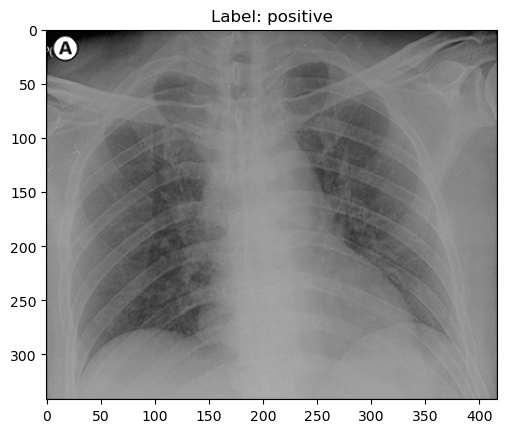

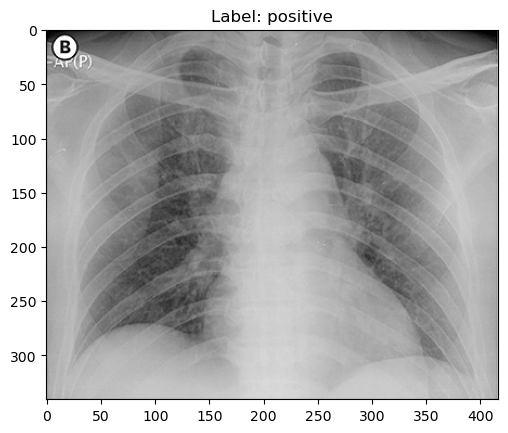

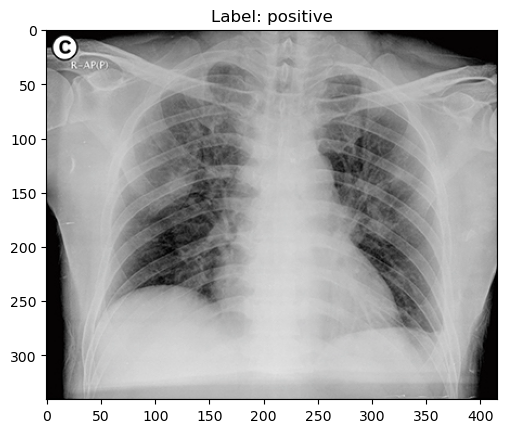

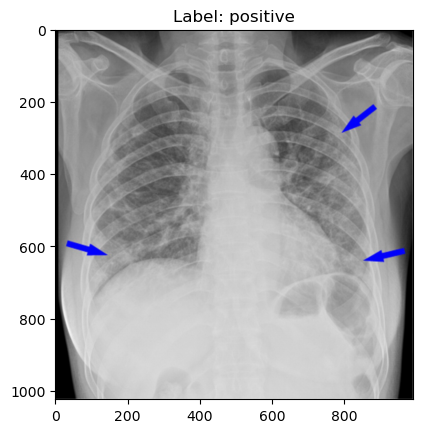

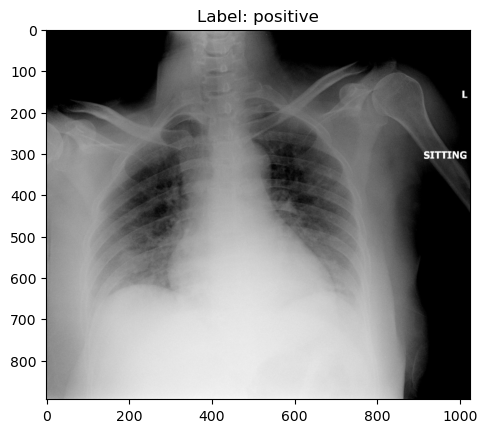

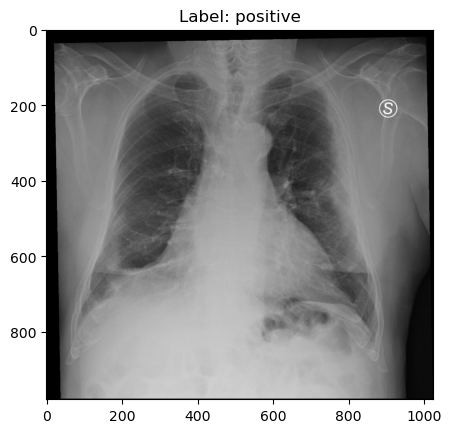

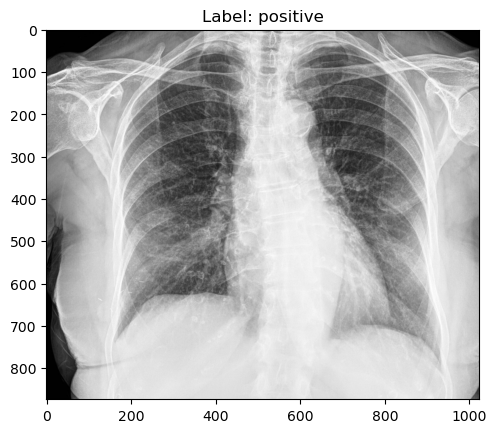

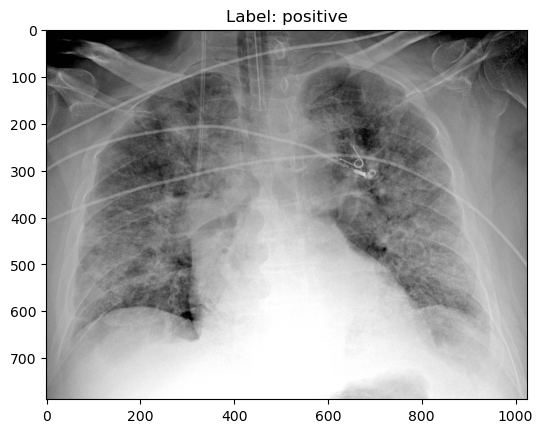

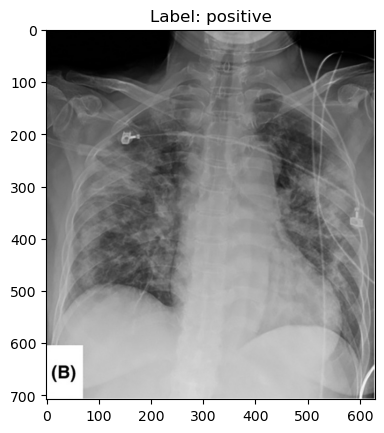

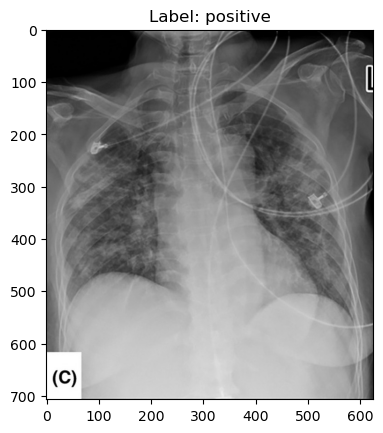

In [3]:
print(image_dataframe.head(10))
print(len(image_dataframe))

# Display the first 10 images
for i in range(10):
    row = image_dataframe.iloc[i]
    image_data = row['image_data']
    labels = row['labels']
    
    # Reshape the flattened pixel values to the original image shape
    #image_shape = (200, 200, 3)  # Replace with your actual image dimensions
    image = np.array(image_data)
    
    # Display the image
    plt.imshow(image)
    plt.title(f'Label: {labels}')
    plt.show()

In [4]:
test_positive_images = []
test_negative_images = []
test_data_path = 'archive/test'
# Iterate through each row in the DataFrame
for index, row in test_dataframe.iterrows():
    # Construct the full path to the image
    img_path_test = os.path.join(test_data_path, row['filename'])
    # Load the image using cv2
    img = cv2.imread(img_path_test)
    #img = cv2.resize(img,(200,200))
    if row['labels'] == 'positive' and len(test_positive_images) < 5:
        test_positive_images.append((img, row['labels']))
    elif row['labels'] == 'negative' and len(test_negative_images) < 5:
        test_negative_images.append((img, row['labels']))
    
    # Break the loop if both positive and negative images reach 5
    if len(test_positive_images) == 5 and len(test_negative_images) == 5:
        break
    print(f"\rPositive Images: {len(test_positive_images)}, Negative Images: {len(test_negative_images)}", end="")
    clear_output(wait=True)
final_test_image_data = test_positive_images + test_negative_images
test_image_dataframe = pd.DataFrame(final_test_image_data, columns=['image_data', 'labels'])

Positive Images: 5, Negative Images: 4

                                          image_data    labels
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  positive
4  [[[0, 0, 0], [0, 0, 0], [114, 114, 114], [111,...  positive
5  [[[230, 230, 230], [225, 225, 225], [219, 219,...  negative
6  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  negative
7  [[[8, 8, 8], [20, 20, 20], [16, 16, 16], [17, ...  negative
8  [[[14, 14, 14], [14, 14, 14], [13, 13, 13], [1...  negative
9  [[[9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], ...  negative
10


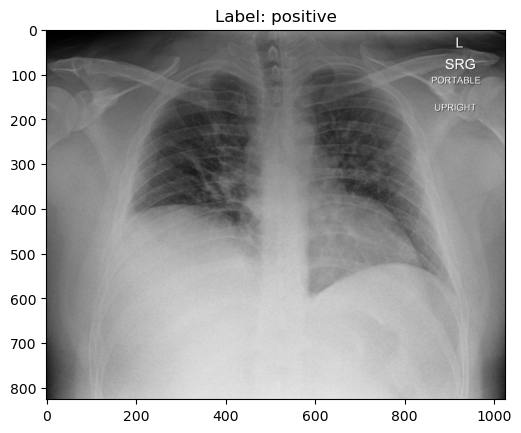

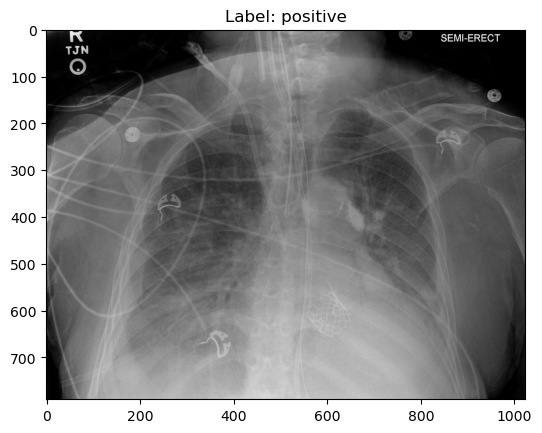

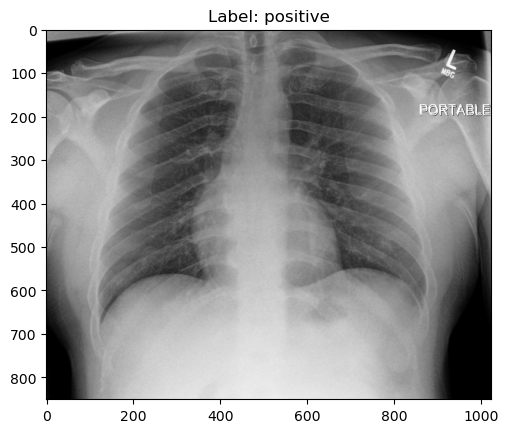

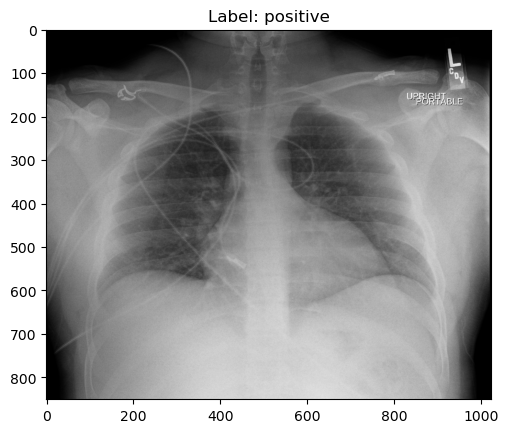

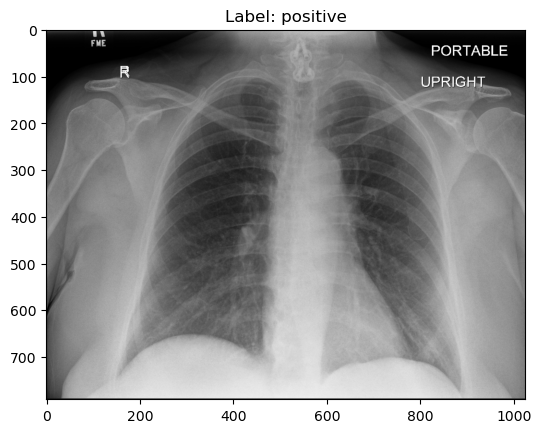

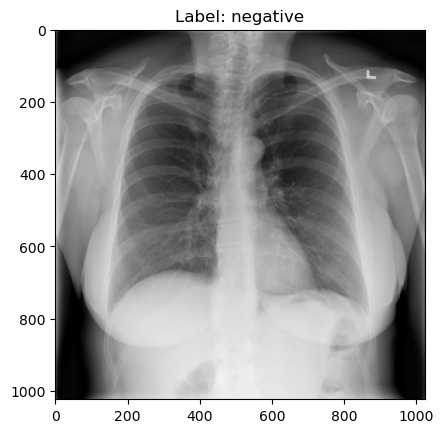

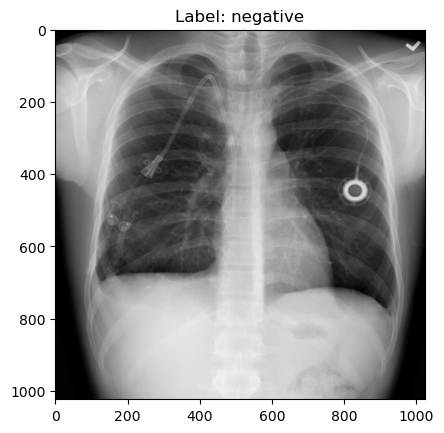

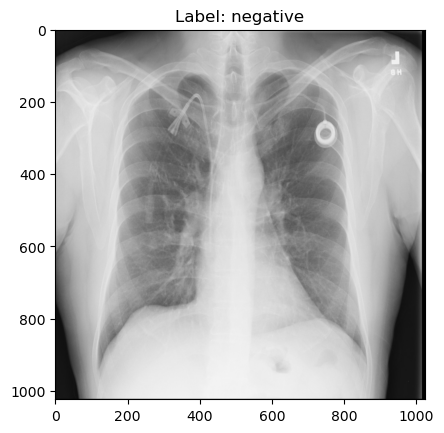

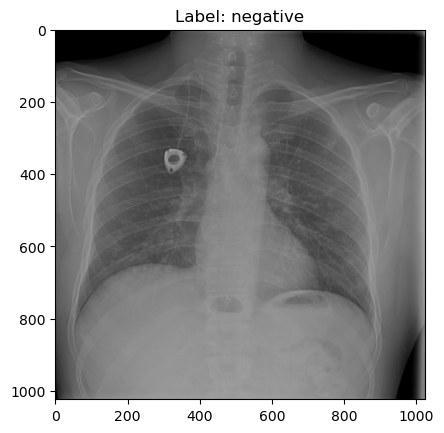

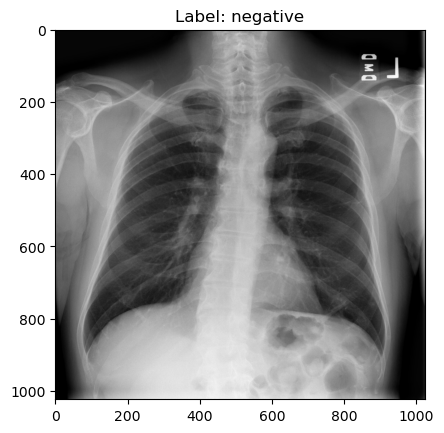

In [5]:
print(test_image_dataframe.head(10))
print(len(test_image_dataframe))

# Display the images
for i in range(10):
    row = test_image_dataframe.iloc[i]
    test_image_data = row['image_data']
    labels = row['labels']
    
    # Reshape the flattened pixel values to the original image shape
    #image_shape = (200, 200, 3)  # Replace with your actual image dimensions
    image = np.array(test_image_data)
    
    # Display the image
    plt.imshow(image)
    plt.title(f'Label: {labels}')
    plt.show()

In [5]:
import torch
# Convert string labels to numerical values
label_mapping = {"positive":1 , "negative":0}
print(label_mapping)
image_dataframe['labels'] = image_dataframe['labels'].replace(label_mapping)
test_image_dataframe['labels'] = test_image_dataframe['labels'].replace(label_mapping)
# Filter test_image_dataframe directly
positive_samples = test_image_dataframe[test_image_dataframe['labels'] == 1].head(5)
negative_samples = test_image_dataframe[test_image_dataframe['labels'] == 0].head(5)
# Combine the samples
for_test_dataframe = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)
for_test_dataframe['labels'] = torch.tensor(for_test_dataframe['labels'].values, dtype=torch.long)
#print(for_test_dataframe)
# Make sure labels are of type torch.long
image_dataframe['labels'] = torch.tensor(image_dataframe['labels'].values, dtype=torch.long)
test_image_dataframe['labels'] = torch.tensor(test_image_dataframe['labels'].values, dtype=torch.long)
for_test_dataframe['labels'] = torch.tensor(for_test_dataframe['labels'].values, dtype=torch.long)
print(image_dataframe.head(10))
print(test_image_dataframe)
#print(for_test_dataframe)

{'positive': 1, 'negative': 0}
                                          image_data  labels
0  [[[151, 151, 151], [37, 37, 37], [71, 71, 71],...       1
1  [[[0, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ...       1
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [2, 0, 0], ...       1
3  [[[162, 162, 162], [0, 0, 0], [0, 0, 0], [0, 0...       1
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1
5  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1
6  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...       1
7  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...       1
8  [[[170, 170, 170], [140, 140, 140], [143, 143,...       1
9  [[[62, 62, 62], [58, 58, 58], [61, 61, 61], [6...       1
                                          image_data  labels
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  

In [6]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data['image_data'][idx]
        
        img = Image.fromarray(img)

        # Apply the transform if available
        if self.transform:
            img = self.transform(img)

        label = self.data['labels'][idx]
        return img, label

# Assuming image_data is a list of tuples (img, label)
'''
transforms = {
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
}
'''
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Create the dataset and data loader
train_dataset = CustomDataset(image_dataframe, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False)
test_dataset = CustomDataset(test_image_dataframe, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
for_test_dataset = CustomDataset(for_test_dataframe, transform=transform)
test_loader1 = DataLoader(for_test_dataset, batch_size=10, shuffle=False)

In [30]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.optim import lr_scheduler
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(CustomModel, self).__init__()
        resnet18 = models.resnet18(weights='IMAGENET1K_V1')
        num_ftrs = resnet18.fc.in_features
        resnet18.fc = nn.Linear(num_ftrs, 200)
        self.resnet18 = resnet18
        self.custom_fc1 = nn.Linear(200, input_size, bias=False)
        self.relu = nn.ReLU()
        self.custom_fc2 = nn.Linear(input_size, hidden_size, bias=False)
        self.custom_fc3 = nn.Linear(hidden_size, 1, bias=False)
        
    def forward(self, x):
        x = self.resnet18(x)
        x = self.relu(x)
        x = self.custom_fc1(x)
        x = self.relu(x)
        x = self.custom_fc2(x)
        x = self.relu(x)
        x = self.custom_fc3(x)
        #x = self.relu(x)
        #y_pred = torch.sigmoid(x)
        return x
# Example usage
n_features = 100  # Adjust based on your input features
model = CustomModel(input_size=n_features, hidden_size=50)
print(f'Prediction of Training Dataset before Training:')
# Assuming your model is already defined and trained
model.eval()  # Set the model to evaluation mode
# Iterate through the test_loader to get predictions
pre_trained_predictions = []
labelss = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs)
        labelss.append(labels)
        #predictions = torch.sigmoid(outputs)
        pre_trained_predictions.append(outputs)
# Combine the predictions from different batches
pre_trained_predictions = torch.cat(pre_trained_predictions)
#labelss = torch.cat(labelss)
pre_trained_predictions = pre_trained_predictions.round()
print(f'Predictions on the test dataset:')
print(pre_trained_predictions)
print(labelss)
# Step 3: Training Setup
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
# Step 4: Training Loop
num_epochs = 8
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        model.train()
        # Forward pass
        outputs = model(inputs)
        # Ensure labels are float and have the same size as the model's output
        labels = labels.view(-1, 1).float()
        #print(f'Output: {outputs}, Labels: {labels}')
        # Check if the size of targets matches the size of predictions
        if labels.size() != outputs.size():
            raise ValueError(f"Target size {labels.size()} must be the same as input size {outputs.size()}")
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    scheduler.step()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.5f}, LR: {optimizer.param_groups[0]["lr"]:.9f}')
# Save the entire model
model.eval()
#torch.save(model, 'custom_model.pth')
trained_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs) 
        trained_predictions.append(outputs)
# Combine the predictions from different batches
trained_predictions = torch.cat(trained_predictions)
trained_predictions = trained_predictions.round()
print(f'Predictions on the test dataset:')
print(trained_predictions)

Prediction of Training Dataset before Training:
Predictions on the test dataset:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
[tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])]
Epoch 1/8, Loss: 0.00105, LR: 0.100000000
Epoch 2/8, Loss: 0.00688, LR: 0.100000000
Epoch 3/8, Loss: 0.69304, LR: 0.010000000
Epoch 4/8, Loss: 0.69336, LR: 0.010000000
Epoch 5/8, Loss: 0.69316, LR: 0.010000000
Epoch 6/8, Loss: 0.69280, LR: 0.001000000
Epoch 7/8, Loss: 0.69319, LR: 0.001000000
Epoch 8/8, Loss: 0.69328, LR: 0.001000000
Predictions on the test dataset:
tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]])


In [54]:
correct_predictions = 0
total_samples = 0
accuracy_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions = torch.round(torch.sigmoid(outputs))
        correct_predictions += (predictions == labels.view_as(predictions)).sum().item()
        total_samples += labels.size(0)
        accuracy_predictions.append(outputs)
accuracy_predictions = torch.cat(accuracy_predictions)
accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 80.00%


In [32]:
torch.save(model, 'custom_model.pth')

In [19]:
model = torch.load('custom_model.pth')
model.eval()
correct_predictions = 0
total_samples = 0
accuracy_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions = torch.round(torch.sigmoid(outputs))
        correct_predictions += (predictions == labels.view_as(predictions)).sum().item()
        total_samples += labels.size(0)
        accuracy_predictions.append(outputs)
accuracy_predictions = torch.cat(accuracy_predictions)
accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 70.00%


# Practice Code

In [29]:
import torch
import torch.nn as nn
import torchvision.models as models

# Step 1: Load pre-trained ResNet-18 model
#resnet18 = models.resnet18(pretrained=True)
resnet18 = models.resnet18(weights='IMAGENET1K_V1')

# Step 2: Modify the final fully connected layer
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 1)  # 2 output units for binary classification
print(f'Prediction of Training Dataset before Training:')
# Assuming your model is already defined and trained
resnet18.eval()  # Set the model to evaluation mode
# Iterate through the test_loader to get predictions
pre_trained_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = resnet18(inputs)
        #predictions = torch.sigmoid(outputs)
        pre_trained_predictions.append(outputs)

# Combine the predictions from different batches
pre_trained_predictions = torch.cat(pre_trained_predictions)
pre_trained_predictions = pre_trained_predictions.round()
print(f'Predictions on the test dataset:')
print(pre_trained_predictions)
# Step 3: Training Setup
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

# Step 5: Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        resnet18.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# Save the trained model if needed
resnet18.eval()
torch.save(model, 'custom_model.pth')
trained_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        #predictions = torch.sigmoid(outputs) 
        trained_predictions.append(outputs)

# Combine the predictions from different batches
trained_predictions = torch.cat(trained_predictions)
trained_predictions = trained_predictions.round()
print(f'Predictions on the test dataset:')
print(trained_predictions)
torch.save(resnet18.state_dict(), 'resnet18_covid_classifier.pth')

Prediction of Training Dataset before Training:
Predictions on the test dataset:
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


ValueError: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.